
# Algoritmo Mean Shift

Dorin Comaniciu and Peter Meer, `Mean Shift: A robust approach toward feature space analysis`.

*IEEE Transactions on Pattern Analysis and Machine Intelligence*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture, metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Generamos muestras con poca distancia
centers = [[0.5, 0.5], [-0.5, -1], [0.5, -1.0]]
O, true_labels = make_blobs(n_samples=750, centers=centers, cluster_std=0.25, random_state=0)

# Escalamos
X = StandardScaler().fit_transform(O)

In [3]:
# The following bandwidth can be automatically detected using...
bandwidth = cluster.estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Compute clustering with MeanShift
ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

In [4]:
print(f'Estimated number of clusters: {n_clusters_}')
print(f'Homogeneity: {metrics.homogeneity_score(true_labels, labels)}')
print(f'Completeness: {metrics.completeness_score(true_labels, labels)}')
print(f'V-measure: {metrics.v_measure_score(true_labels, labels)}')
print(f'Adjusted Rand Index: {metrics.adjusted_rand_score(true_labels, labels)}')
print(f'Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(true_labels, labels, average_method="arithmetic")}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X, labels)}')

Estimated number of clusters: 3
Homogeneity: 0.9407372124091287
Completeness: 0.9407554806048698
V-measure: 0.9407463464183125
Adjusted Rand Index: 0.9606954694698651
Adjusted Mutual Information: 0.940601650962084
Silhouette Coefficient: 0.6404359133332904


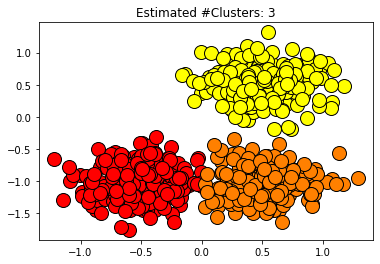

In [5]:
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    cluster_center = cluster_centers[k]

    xy = O[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

plt.title(f'Estimated #Clusters: {n_clusters_}')
plt.show()